In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2017-01-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2017_1q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-01-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6900,북구,7425,북구,525,7.61%,"7,163"
1,2017-01-12,간장,오복왕표 0.9ℓ 1병,4750,북구,6250,북구,1500,31.58%,"5,500"
2,2017-01-12,고등어,30㎝정도 500g 1마리,2300,북구,4750,북구,2450,106.52%,"3,525"
3,2017-01-12,달걀,오경슈퍼란60g정도 10개,3680,북구,4200,북구,520,14.13%,"3,940"
4,2017-01-12,닭고기,육계 1.0㎏,6800,북구,7520,북구,720,10.59%,"7,160"
5,2017-01-12,대파,1.0㎏,2980,북구,4685,북구,1705,57.21%,"3,833"
6,2017-01-12,돼지고기,삼겹살 500g,9100,북구,9900,북구,800,8.79%,"9,500"
7,2017-01-12,두부,500g 판두부(국산포장두부 420g) 1모,3580,북구,4365,북구,785,21.93%,"3,973"
8,2017-01-12,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2017-01-12,맥주,하이트 500㎖ 1병,1330,북구,1380,북구,50,3.76%,"1,355"


In [2]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2017-04-13"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2017_2q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-04-13,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7425,북구,8900,북구,1475,19.87%,"8,163"
1,2017-04-13,간장,오복왕표 0.9ℓ 1병,5200,북구,6250,북구,1050,20.19%,"5,725"
2,2017-04-13,고등어,30㎝정도 500g 1마리,4200,북구,4800,북구,600,14.29%,"4,500"
3,2017-04-13,달걀,오경슈퍼란60g정도 10개,2980,북구,3960,북구,980,32.89%,"3,470"
4,2017-04-13,닭고기,육계 1.0㎏,7810,북구,9028,북구,1218,15.6%,"8,419"
5,2017-04-13,대파,1.0㎏,2780,북구,4685,북구,1905,68.53%,"3,733"
6,2017-04-13,돼지고기,삼겹살 500g,8400,북구,10450,북구,2050,24.4%,"9,425"
7,2017-04-13,두부,500g 판두부(국산포장두부 420g) 1모,3480,북구,4365,북구,885,25.43%,"3,923"
8,2017-04-13,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2017-04-13,맥주,하이트 500㎖ 1병,1410,북구,1460,북구,50,3.55%,"1,435"


In [3]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2017-07-06"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2017_3q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-07-06,가루비누,"세탁용세제(LG테크),가루형,3.0kg",7900,북구,8175,북구,275,3.48%,"8,038"
1,2017-07-06,간장,오복왕표 0.9ℓ 1병,5200,북구,6350,북구,1150,22.12%,"5,775"
2,2017-07-06,고등어,30㎝정도 500g 1마리,3375,북구,3900,북구,525,15.56%,"3,638"
3,2017-07-06,달걀,오경슈퍼란60g정도 10개,3420,북구,3480,북구,60,1.75%,"3,450"
4,2017-07-06,닭고기,육계 1.0㎏,6620,북구,8480,북구,1860,28.1%,"7,550"
5,2017-07-06,대파,1.0㎏,1580,북구,2828,북구,1248,78.99%,"2,204"
6,2017-07-06,돼지고기,삼겹살 500g,11400,북구,11800,북구,400,3.51%,"11,600"
7,2017-07-06,두부,500g 판두부(국산포장두부 420g) 1모,3780,북구,4365,북구,585,15.48%,"4,073"
8,2017-07-06,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2017-07-06,맥주,하이트 500㎖ 1병,1380,북구,1410,북구,30,2.17%,"1,395"


In [4]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
from IPython.display import display
from datetime import datetime

# 지역 이름과 코드 설정
region_name = "북구"
region_code = "10"
target_date = "2017-10-12"  # 날짜 열에 들어갈 날짜

# 요청 URL 및 파라미터
url = "https://www.busan.go.kr/depart/abnecessity01"
params = {
    "isMart": "true",
    "kind": "",
    "schDate": target_date,
    "schCode": "0",
    "schLocale": region_code,
    "schMart": "0"
}

# 요청 보내기
response = requests.get(url, params=params)
response.encoding = 'utf-8'

# HTML 파싱
soup = BeautifulSoup(response.text, 'html.parser')
table = soup.find("table", class_="boardList")

# 결과 저장 리스트
result = []

# 데이터 수집
if table:
    rows = table.find_all("tr")
    for row in rows:
        tds = row.find_all("td")
        td_texts = [td.get_text(strip=True) for td in tds]
        
        if len(td_texts) >= 5:
            item_name = td_texts[0]
            spec = td_texts[1]
            try:
                lowest_price = int(td_texts[2].replace(",", ""))
                highest_price = int(td_texts[3].replace(",", ""))
            except ValueError:
                continue
            avg_price = td_texts[4]
            
            price_diff = highest_price - lowest_price
            price_ratio = f"{round((price_diff / lowest_price) * 100, 2)}%"
            
            result.append([
                target_date, item_name, spec, lowest_price, region_name,
                highest_price, region_name, price_diff, price_ratio, avg_price
            ])
else:
    print("boardList 테이블을 찾을 수 없습니다.")

# DataFrame 생성 및 열 지정
columns = ["날짜", "품목", "규격", "최저가", "최저가_지역", "최고가", "최고가_지역", "가격차이", "차이비율(%)", "금주평균가"]
df = pd.DataFrame(result, columns=columns)

# 표 형태로 출력 (JupyterLab)
display(df)

df.to_csv("북구2017_4q.csv", index=False, encoding="utf-8-sig")


,날짜,품목,규격,최저가,최저가_지역,최고가,최고가_지역,가격차이,차이비율(%),금주평균가
0,2017-10-12,가루비누,"세탁용세제(LG테크),가루형,3.0kg",6540,북구,6900,북구,360,5.5%,"6,720"
1,2017-10-12,간장,오복왕표 0.9ℓ 1병,4580,북구,6350,북구,1770,38.65%,"5,465"
2,2017-10-12,고등어,30㎝정도 500g 1마리,2437,북구,2500,북구,63,2.59%,"2,469"
3,2017-10-12,달걀,오경슈퍼란60g정도 10개,2780,북구,3000,북구,220,7.91%,"2,890"
4,2017-10-12,닭고기,육계 1.0㎏,5950,북구,8500,북구,2550,42.86%,"7,225"
5,2017-10-12,대파,1.0㎏,2780,북구,3780,북구,1000,35.97%,"3,280"
6,2017-10-12,돼지고기,삼겹살 500g,9900,북구,11400,북구,1500,15.15%,"10,650"
7,2017-10-12,두부,500g 판두부(국산포장두부 420g) 1모,3780,북구,4365,북구,585,15.48%,"4,073"
8,2017-10-12,라면,신라면 120g 1봉지,676,북구,680,북구,4,0.59%,678
9,2017-10-12,맥주,하이트 500㎖ 1병,1410,북구,1460,북구,50,3.55%,"1,435"


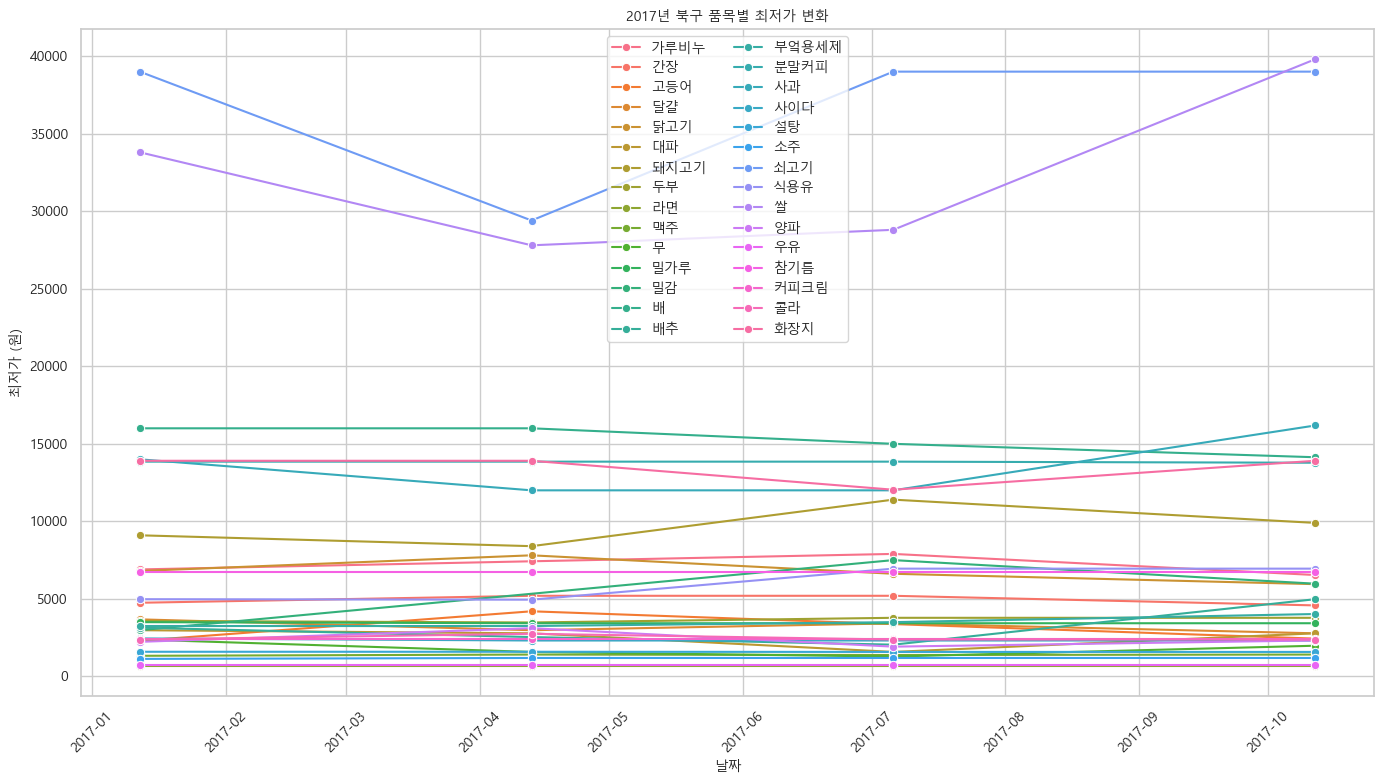

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2017_1q.csv")
q2 = pd.read_csv("북구2017_2q.csv")
q3 = pd.read_csv("북구2017_3q.csv")
q4 = pd.read_csv("북구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최저가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 북구 품목별 최저가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최저가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()


# df_all을 저장하는 코드
df_all.to_csv("북구2017_min.csv", index=False, encoding="utf-8-sig")

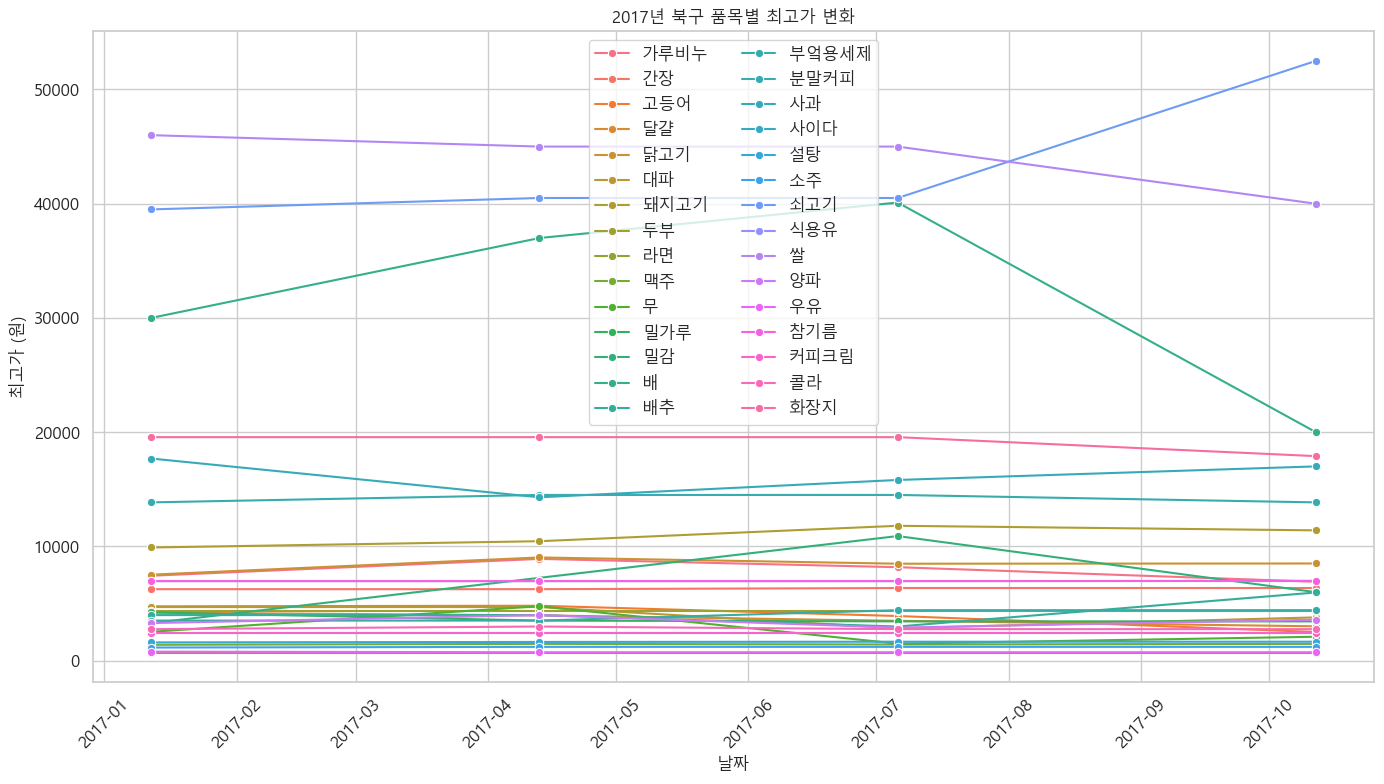

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import font_manager, rc
from matplotlib.font_manager import FontProperties

# 📌 강제로 폰트 지정
font_path = "C:/Windows/Fonts/malgun.ttf"
font_prop = FontProperties(fname=font_path)

# CSV 파일 불러오기
q1 = pd.read_csv("북구2017_1q.csv")
q2 = pd.read_csv("북구2017_2q.csv")
q3 = pd.read_csv("북구2017_3q.csv")
q4 = pd.read_csv("북구2017_4q.csv")

# 하나로 합치기
df_all = pd.concat([q1, q2, q3, q4], ignore_index=True)
df_all["날짜"] = pd.to_datetime(df_all["날짜"])

# 시각화
plt.figure(figsize=(14, 8))
sns.set(style="whitegrid")

# 선그래프
sns.lineplot(data=df_all, x="날짜", y="최고가", hue="품목", marker="o")

# 그래프 꾸미기 (여기서 FontProperties 적용!)
plt.title("2017년 북구 품목별 최고가 변화", fontsize=16, fontproperties=font_prop)
plt.xlabel("날짜", fontproperties=font_prop)
plt.ylabel("최고가 (원)", fontproperties=font_prop)
plt.xticks(rotation=45, fontproperties=font_prop)
plt.yticks(fontproperties=font_prop)
plt.legend(loc="best", fontsize=9, ncol=2, prop=font_prop)
plt.tight_layout()
plt.show()

# df_all을 저장하는 코드
df_all.to_csv("북구2017_max.csv", index=False, encoding="utf-8-sig")